### Sterling E-Commerce Customer Segmentation

In [36]:
# Import Data Analysis Libraries
import numpy as np
import pandas as pd

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# ML and Evaluation Libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [37]:
# df1 = pd.read_excel(r"../Internship/Sterling_E-Commerce_Data.xlsx")
# df1.head()

In [38]:
# Import Data
df = pd.read_excel(r"..\Internship\Sterling_E-Commerce_Data.xlsx")
df.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [39]:
df['Category'].unique()

array(['Health & Sports', "Men's Fashion", 'Computing', 'Entertainment',
       'Mobiles & Tablets', 'Superstore', 'Appliances',
       'Beauty & Grooming', 'Home & Living', 'Soghaat', "Women's Fashion",
       'School & Education', 'Books', 'Kids & Baby', 'Others'],
      dtype=object)

In [40]:
df['Region'].unique()

array(['Midwest', 'West', 'South', 'Northeast'], dtype=object)

In [41]:
df['Payment Method'].unique()

array(['Easypay_MA', 'Payaxis', 'apg', 'bankalfalah', 'cod',
       'customercredit', 'easypay_voucher', 'Easypay', 'jazzvoucher',
       'jazzwallet', 'mcblite', 'cashatdoorstep', 'financesettlement'],
      dtype=object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [43]:
# Impute order quantity with mean
#df['Order Id'].fillna(df['Order Id'].mean(), inplace=True)
df.shape

(283083, 19)

### Data Pre-Processing

In [44]:
# Checking for missing values
null_val = df.isnull().sum()
null_val

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [45]:
# Drop null values
df.dropna(inplace=True)

- Five missing values in Order Id column

In [46]:
df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [47]:
df.describe()

,Cust Id,Customer Since,Date of Order,Item Id,Order Id,Ref Num,Zip,Qty Ordered,Total
count,283078.000000,283078,283078,283078.000000,2.830780e+05,283078.000000,283078.000000,283078.000000,283078.000000
mean,70106.401674,2007-10-11 21:38:59.406100224,2022-03-12 12:21:32.285518336,741745.081239,1.004570e+08,561103.707236,49147.444333,3.008238,816.232342
min,4.000000,1978-11-04 00:00:00,2021-10-01 00:00:00,574769.000000,1.003547e+08,111127.000000,210.000000,1.000000,0.000000
25%,56640.000000,2002-08-24 00:00:00,2021-12-24 00:00:00,659897.250000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000
50%,74320.000000,2010-03-22 00:00:00,2022-03-16 00:00:00,742468.500000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000
75%,92371.000000,2015-01-05 00:00:00,2022-05-18 00:00:00,826075.750000,1.005134e+08,782182.250000,72004.750000,3.000000,800.000000
max,115326.000000,2017-07-28 00:00:00,2022-09-30 00:00:00,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000
std,30215.281047,NaN,NaN,95664.051170,6.090992e+04,256099.906291,27235.638638,4.565207,1986.176881


In [48]:
# Drop unique columns
#df.drop('Cust Id', axis=1, inplace=True)
#df.drop('Item Id', axis=1, inplace=True)
#df.drop('Order Id', axis=1, inplace=True)
#df.drop('Ref Num', axis=1, inplace=True)
#df.drop('Zip', axis=1, inplace=True)

In [49]:
# Check for duplicates
dup = df.duplicated().sum()
dup

0

- No duplicates.

### Exploratory Data  Analysis

#### Univariate Data Analysis

In [50]:
# # Compute Total Sales
# total_sales = df['Total'].sum()
# total_quantity = df['Qty Ordered'].sum()
# total_orders_made = df['Order Id'].size()

# df = pd.DataFrame({'Total_Sales': total_sales, 'Total Orders': total_orders_made});

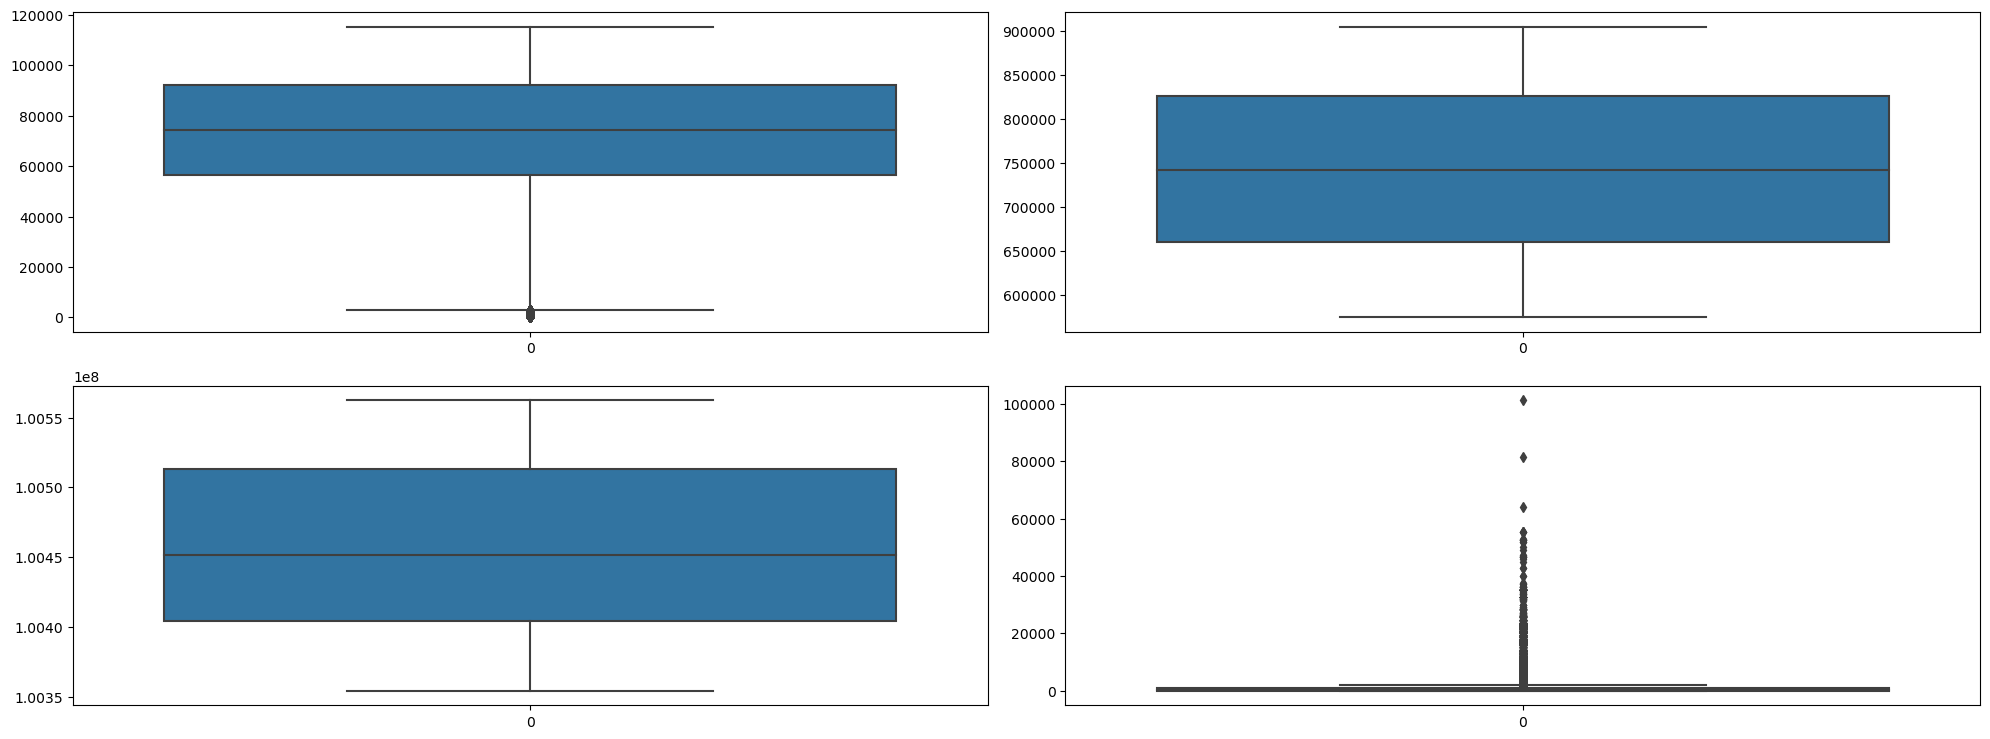

In [51]:
fig, axis = plt.subplots(2,2, figsize = (20, 7.5))
plt1 = sns.boxplot(df['Cust Id'], ax=axis[0,0])
plt2 = sns.boxplot(df['Item Id'], ax=axis[0,1])
plt3 = sns.boxplot(df['Order Id'], ax=axis[1,0])
plt4 = sns.boxplot(df['Total'], ax=axis[1,1])

plt.tight_layout()

In [52]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')